<a href="https://colab.research.google.com/github/DATASCIENCE-PROJECT-GROUP/dspl/blob/main/Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL NO.1 - RANDOM FOREST

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load data
file_path = "/content/processed_data (1).csv"
df = pd.read_csv(file_path)

In [ ]:
# Drop irrelevant column
df = df.drop(columns=["Customer_ID"])

In [ ]:
# Remove class 3 due to insufficient data
df = df[df["cluster_catgeory"] != 3]

In [ ]:
# Split data
X = df.drop(columns=["cluster_catgeory"])
y = df["cluster_catgeory"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_jobs=-1, random_state=42)

In [ ]:
# Predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [ ]:
# Accuracy scores
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

In [ ]:
# Cross-validation score
cv_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring="accuracy")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

In [ ]:
# Feature Importance
feature_importances = pd.DataFrame({"Feature": X.columns, "Importance": rf.feature_importances_})
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

<ipython-input-12-0089aa104aa4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")


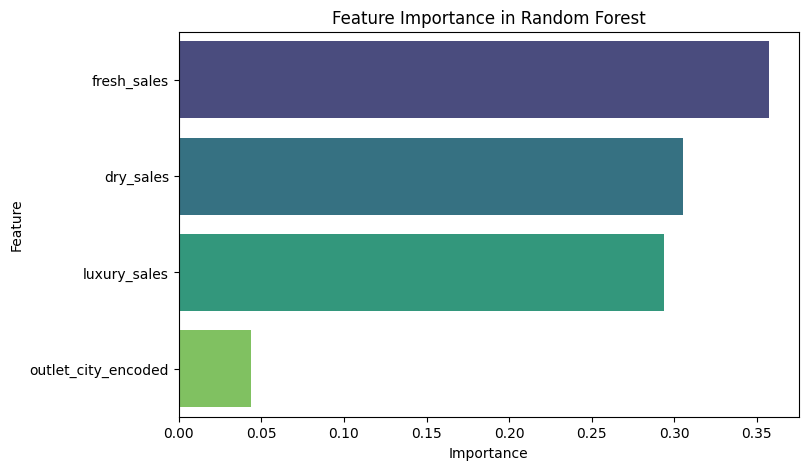

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances["Importance"], y=feature_importances["Feature"], palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.show()

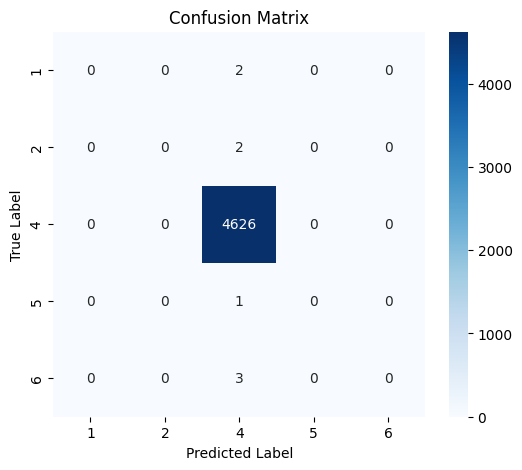

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Learning Curve
import numpy as np # Importing the numpy library
from sklearn.model_selection import learning_curve, train_test_split, cross_val_score
train_sizes, train_scores, test_scores = learning_curve(rf, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


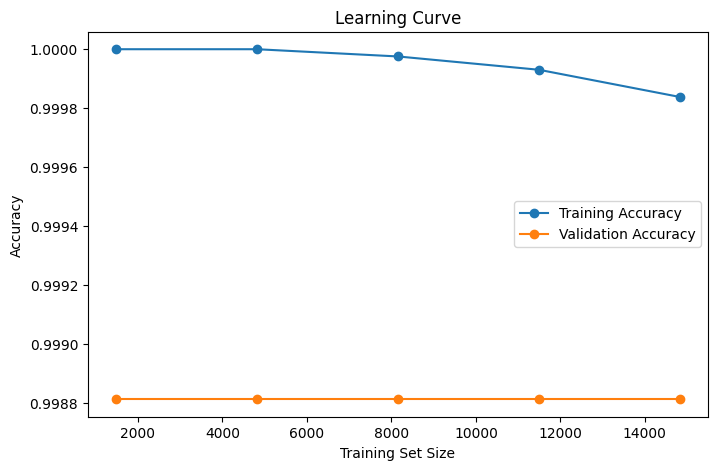

In [ ]:
# Plot Learning Curve
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker='o')
plt.plot(train_sizes, test_mean, label="Validation Accuracy", marker='o')
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [ ]:
# Print Overfitting/Underfitting Indicators
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")

Train Accuracy: 0.9995
Test Accuracy: 0.9983
Cross-validation Accuracy: 0.9988


In [ ]:
# Print results
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.9995
Test Accuracy: 0.9983
Cross-validation Accuracy: 0.9988
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           4       1.00      1.00      1.00      4626
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3

    accuracy                           1.00      4634
   macro avg       0.20      0.20      0.20      4634
weighted avg       1.00      1.00      1.00      4634



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Decision on overfitting/underfitting
if train_acc > 0.95 and (train_acc - test_acc) > 0.1:
    print("Overfitting Detected: High training accuracy but low test accuracy.")
elif train_acc < 0.7 and test_acc < 0.7:
    print("Underfitting Detected: Both training and test accuracy are low.")
else:
    print("Model is well-balanced.")

Model is well-balanced.


In [ ]:
# Print classification report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           4       1.00      1.00      1.00      4626
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3

    accuracy                           1.00      4634
   macro avg       0.20      0.20      0.20      4634
weighted avg       1.00      1.00      1.00      4634



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


MODEL NO.2 - SUPPORT VECTOR CLASSIFIER (SVC)

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
# Loading the dataset
data = pd.read_csv('processed_data (1).csv')
print("Data Preview:\n", data.head())
print("\nTarget Class Distribution:\n", data['cluster_catgeory'].value_counts())

Data Preview:
    Customer_ID  luxury_sales  fresh_sales  dry_sales  cluster_catgeory  \
0     10493832     -1.018469    -1.254026  -0.742305                 4   
1     10178643     -0.299752    -0.478121  -0.377035                 1   
2     10513916      1.020050     0.596020   1.231109                 4   
3     10334589      0.993720     1.255928   1.202627                 4   
4     10458365      1.126974     2.097691   1.276297                 4   

   outlet_city_encoded  
0                    4  
1                    6  
2                   10  
3                   10  
4                    4  

Target Class Distribution:
 cluster_catgeory
4    23137
1        9
5        9
6        8
2        4
3        1
Name: count, dtype: int64


In [ ]:
 # Removing the classes with less than 2 samples
class_counts = data['cluster_catgeory'].value_counts()
rare_classes = class_counts[class_counts < 2].index
data = data[~data['cluster_catgeory'].isin(rare_classes)]
print("\n After Removing Rare Classes:\n", data['cluster_catgeory'].value_counts())


 After Removing Rare Classes:
 cluster_catgeory
4    23137
1        9
5        9
6        8
2        4
Name: count, dtype: int64


In [ ]:
# Defining Features and Target
X = data.drop(['Customer_ID', 'cluster_catgeory'], axis=1)
y = data['cluster_catgeory']

In [ ]:
# Spliting  Test and Train
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# PCA for Visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
# SVM hyperparameter tuning with grid search
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.1, 1],
    'kernel': ['rbf', 'linear']
}
grid_search = GridSearchCV(SVC(class_weight='balanced'), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print("\n Best SVM Parameters:", grid_search.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



 Best SVM Parameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [ ]:
# Final SVM Model Training
svm_model = SVC(**grid_search.best_params_, class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled, y_train)

SVC(C=10, class_weight='balanced', gamma=1, random_state=42)

In [ ]:
# Accuracy and predictions
y_train_pred = svm_model.predict(X_train_scaled)
y_test_pred = svm_model.predict(X_test_scaled)

train_acc = accuracy_score(y_train, y_train_pred) * 100
test_acc = accuracy_score(y_test, y_test_pred) * 100

print(f"\n Training Accuracy: {train_acc:.2f}%")
print(f" Testing Accuracy: {test_acc:.2f}%")


 Training Accuracy: 97.83%
 Testing Accuracy: 97.45%


In [ ]:
# Classification Report
print("\n Classification Report:\n", classification_report(y_test, y_test_pred))


 Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           4       1.00      0.98      0.99      4628
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.97      4634
   macro avg       0.20      0.20      0.20      4634
weighted avg       1.00      0.97      0.99      4634



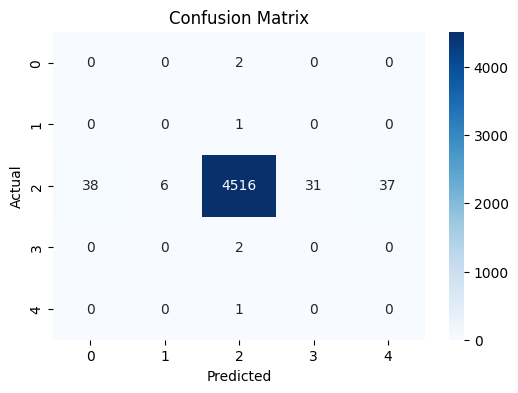

In [ ]:
# Ploting confusion matrix plot
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

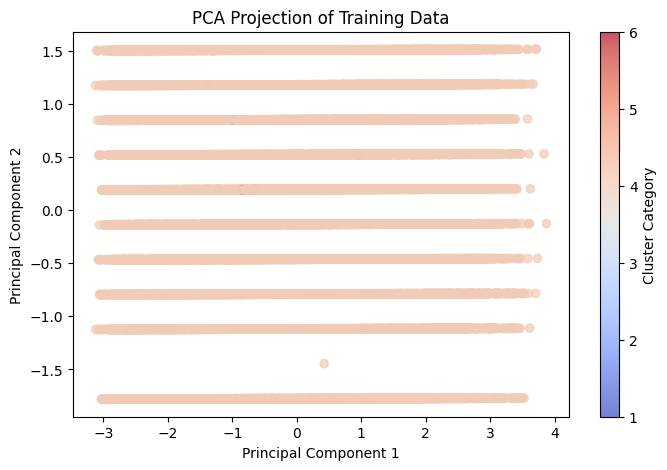

In [ ]:
# PCA Scatter Plot
plt.figure(figsize=(8, 5))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.7)
plt.title("PCA Projection of Training Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label='Cluster Category')
plt.show()

In [ ]:
MODEL NO.3 - EXTREME GRADIENT BOOSTING

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint

In [ ]:
# Load dataset
df = pd.read_csv("/content/drive/MyDrive/DSPL Cw/processed_data new.csv")

# Display first few rows
print(df.head())

# Fill missing values with median
df.fillna(df.median(), inplace=True)

   Customer_ID  luxury_sales  fresh_sales  dry_sales  cluster_catgeory  \
0     10493832     -1.018469    -1.254026  -0.742305                 4   
1     10178643     -0.299752    -0.478121  -0.377035                 1   
2     10513916      1.020050     0.596020   1.231109                 4   
3     10334589      0.993720     1.255928   1.202627                 4   
4     10458365      1.126974     2.097691   1.276297                 4   

   outlet_city_encoded  
0                    4  
1                    6  
2                   10  
3                   10  
4                    4  


In [ ]:
# Convert categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)

In [ ]:
# Define features and target
X = df.drop("luxury_sales", axis=1)
y = df["luxury_sales"]

In [ ]:
# Split dataset into Training and Testing (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initialize and train the model with Default Hyperparameters
model = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)
cv_r2 = cross_val_score(model, X, y, cv=5).mean()

In [ ]:
print(f"\nPerformance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Test R-squared (R²): {r2:.4f}")
print(f"Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}, Cross-Validation R²: {cv_r2:.4f}")


Performance Metrics:
Mean Squared Error (MSE): 0.1013
Test R-squared (R²): 0.8999
Train R²: 0.9410, Test R²: 0.8999, Cross-Validation R²: 0.9003


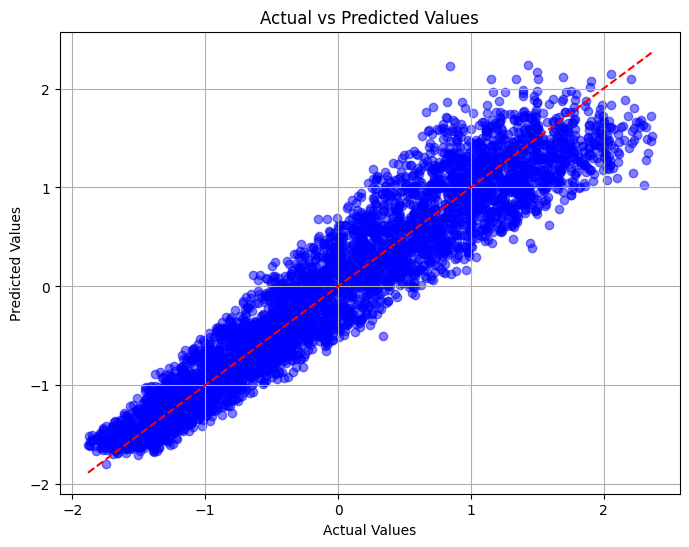

In [ ]:
# Plot Actual vs Predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.grid(True)
plt.show()

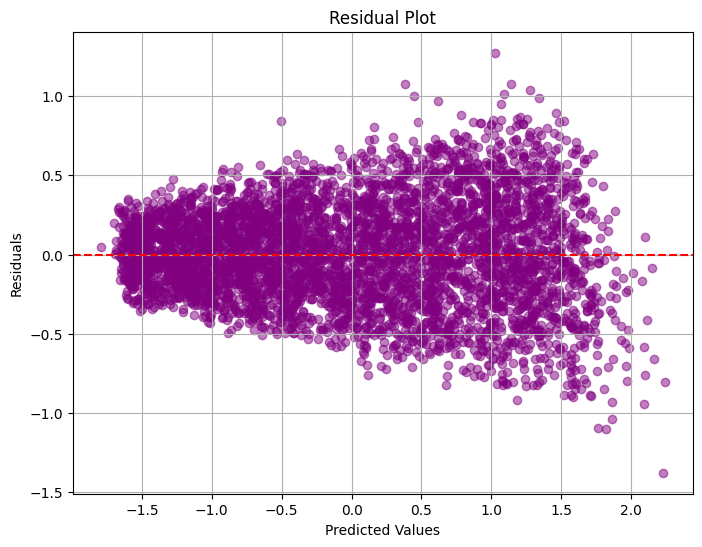

In [ ]:
#Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.5, color="purple")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(True)
plt.show()

In [ ]:
# Overfitting/Underfitting Analysis
if train_r2 > 0.95 and (train_r2 - test_r2) > 0.1:
    print("Overfitting Detected: High training accuracy but low test accuracy.")
elif train_r2 < 0.7 and test_r2 < 0.7:
    print("Underfitting Detected: Both training and test accuracy are low.")
else:
    print("Model is well-balanced.")

Model is well-balanced.


Model 4 - Logistic Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load your data
df = pd.read_csv("/content/drive/MyDrive/DSPL Cw/processed_data new.csv")

In [ ]:
# Display first few rows
print(df.head())

# Fill missing values with median
df.fillna(df.median(), inplace=True)

# Convert categorical variables to numeric
df = pd.get_dummies(df, drop_first=True)

   Customer_ID  luxury_sales  fresh_sales  dry_sales  cluster_catgeory  \
0     10493832     -1.018469    -1.254026  -0.742305                 4   
1     10178643     -0.299752    -0.478121  -0.377035                 1   
2     10513916      1.020050     0.596020   1.231109                 4   
3     10334589      0.993720     1.255928   1.202627                 4   
4     10458365      1.126974     2.097691   1.276297                 4   

   outlet_city_encoded  
0                    4  
1                    6  
2                   10  
3                   10  
4                    4  


In [ ]:
# Define features and target
target_column_name = "cluster_catgeory"
X = df.drop(target_column_name, axis=1)
y = df[target_column_name]

In [ ]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Train Logistic Regression model (multinomial for multi-class classification)
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=200, multi_class='multinomial')

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           4       1.00      1.00      1.00      4628
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1

    accuracy                           1.00      4634
   macro avg       0.20      0.20      0.20      4634
weighted avg       1.00      1.00      1.00      4634



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

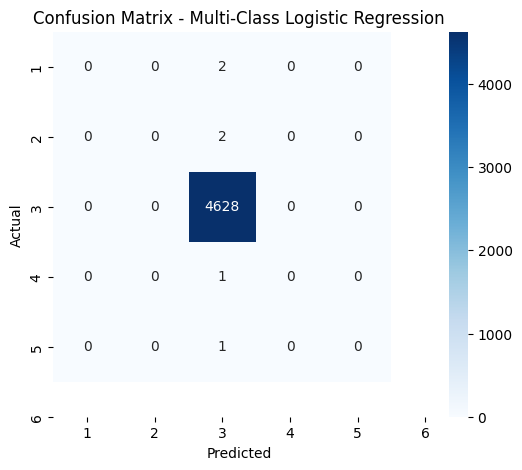

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Multi-Class Logistic Regression')
plt.show()

In [ ]:
# Print Overfitting/Underfitting Indicators
# Calculate train accuracy for Logistic Regression
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Train Accuracy: 0.9987
Test Accuracy: 0.9987


In [ ]:
# Calculate cross-validation score for Logistic Regression
cv_scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")

print(f"Cross-validation Accuracy: {cv_scores.mean():.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default 

Cross-validation Accuracy: 0.9987


In [ ]:
# Decision on overfitting/underfitting
if train_acc > 0.95 and (train_acc - test_acc) > 0.1:
    print("Overfitting Detected: High training accuracy but low test accuracy.")
elif train_acc < 0.7 and test_acc < 0.7:
    print("Underfitting Detected: Both training and test accuracy are low.")
else:
    print("Model is well-balanced.")

Model is well-balanced.


Model 5 - Decision Tree

In [2]:
import pandas as pd
import numpy as np

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/processed_data new.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23168 entries, 0 to 23167
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer_ID          23168 non-null  int64  
 1   luxury_sales         23168 non-null  float64
 2   fresh_sales          23168 non-null  float64
 3   dry_sales            23168 non-null  float64
 4   cluster_catgeory     23168 non-null  int64  
 5   outlet_city_encoded  23168 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.1 MB


In [6]:
print(df.columns.tolist())

['Customer_ID', 'luxury_sales', 'fresh_sales', 'dry_sales', 'cluster_catgeory', 'outlet_city_encoded']


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Separate features (X) and target variable (y)
X = df.drop(columns=['cluster_catgeory'])  # Features
y = df['cluster_catgeory']  # Target variable

# Split into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [10]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt

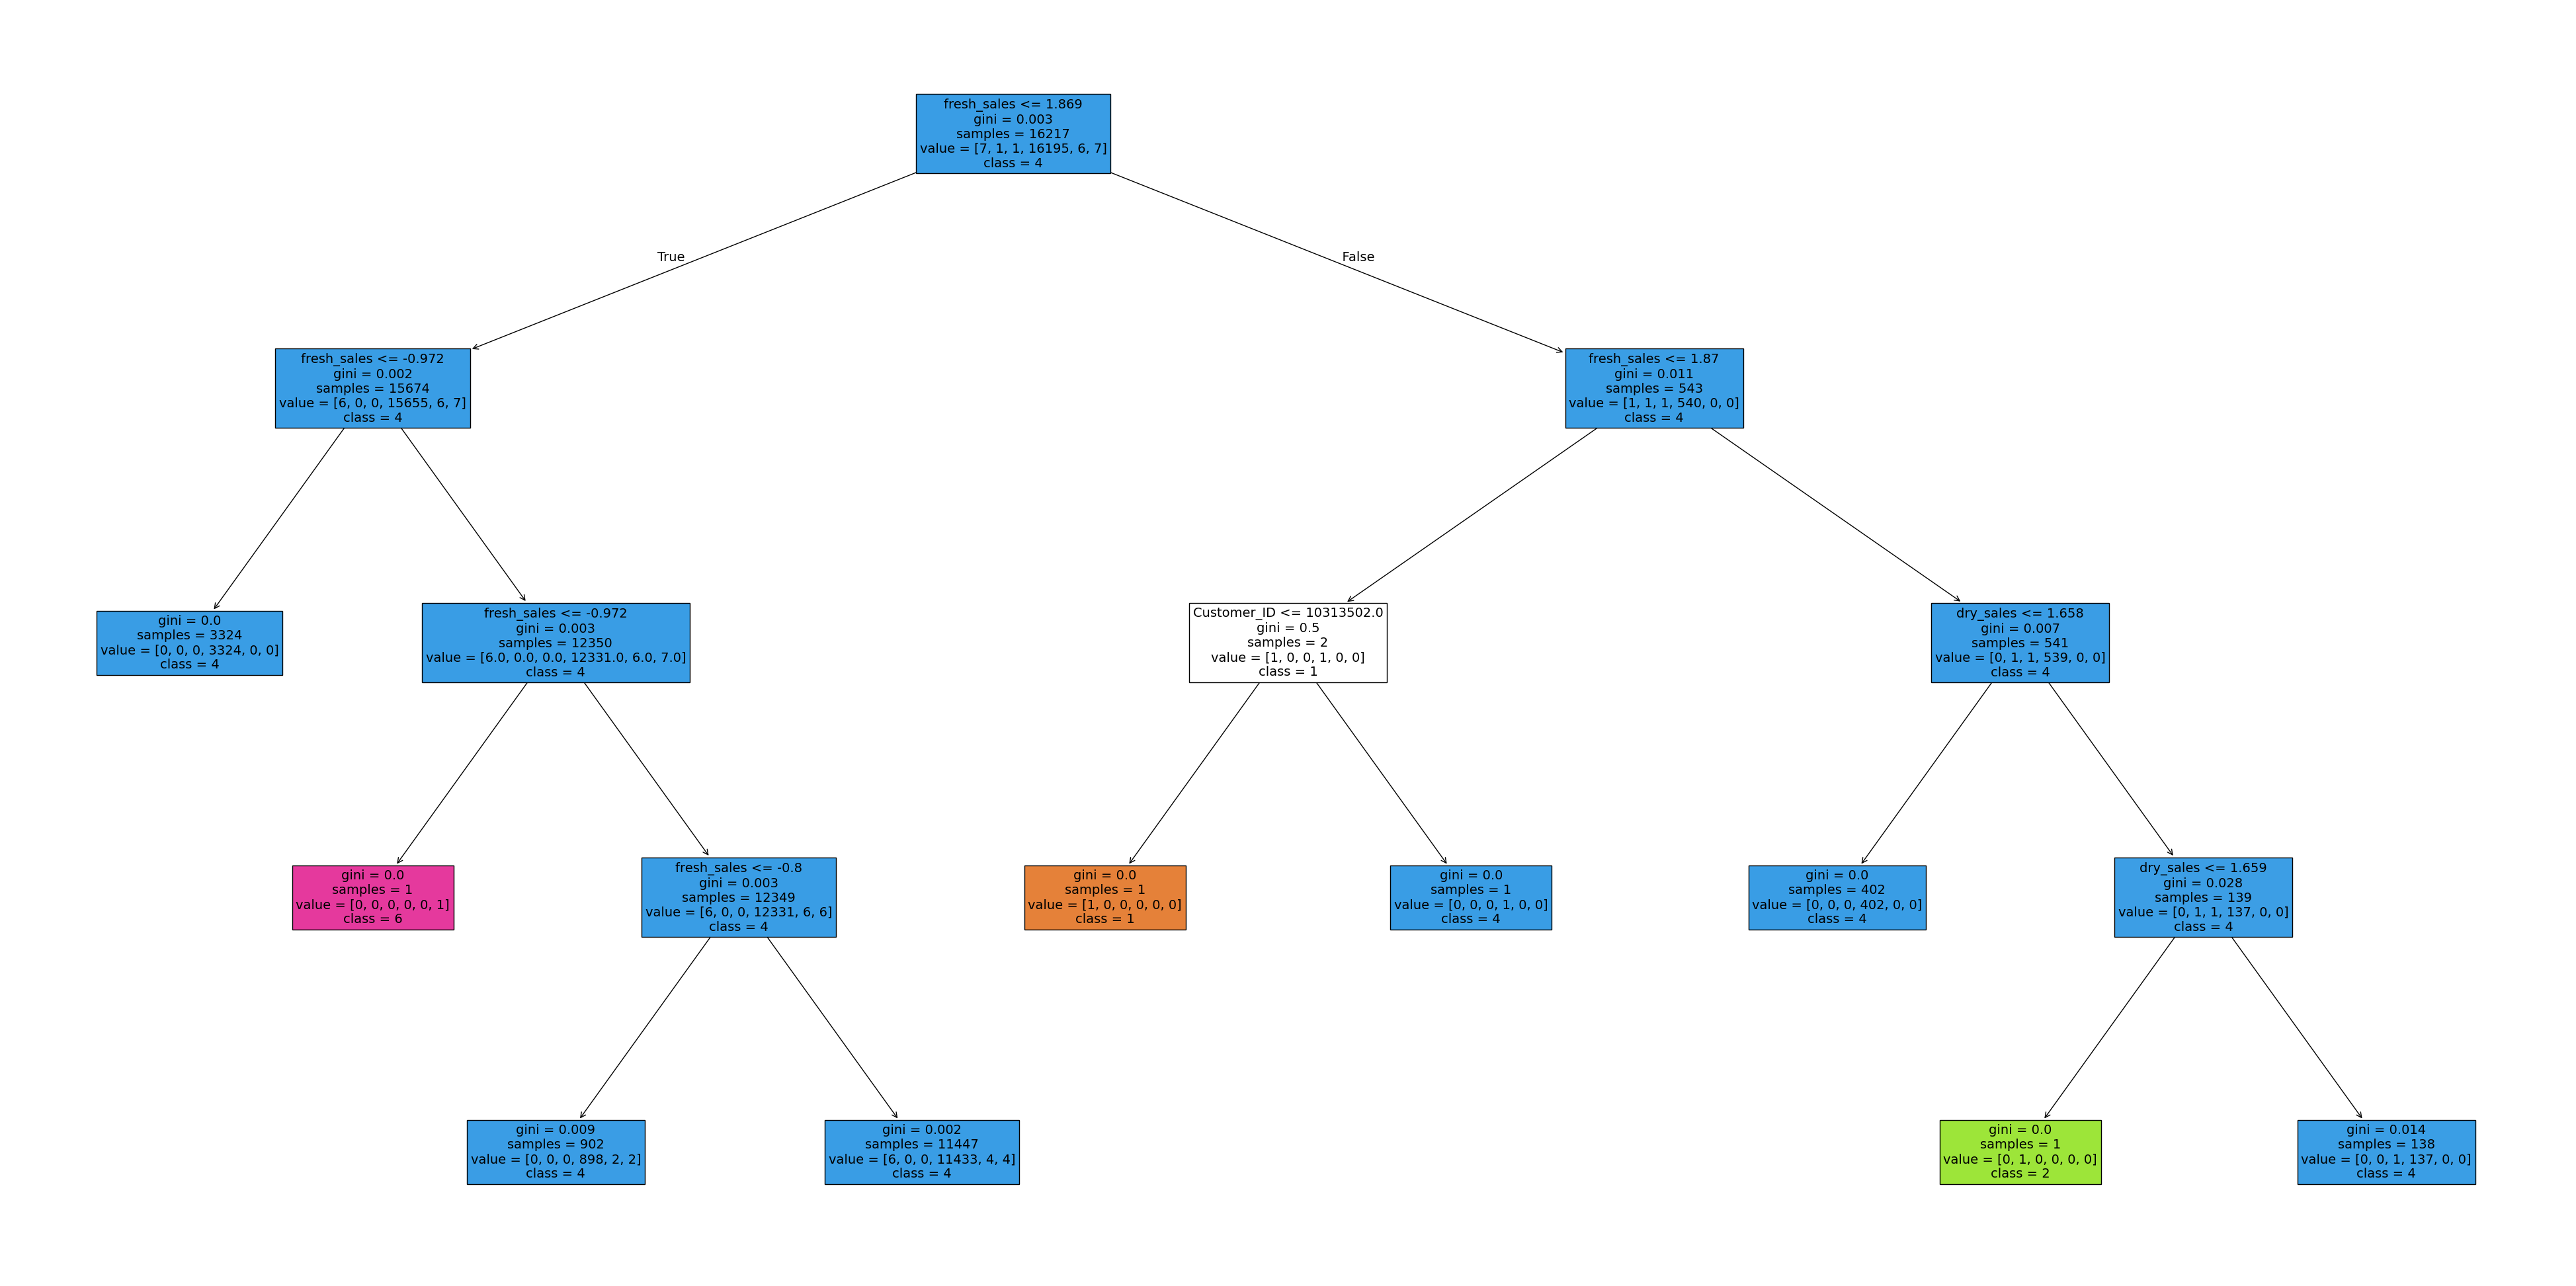

In [12]:
#Visualising decision tree classifier
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

plt.figure(figsize=(50,25))  # Large figure size
tree.plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=[str(cls) for cls in dt_model.classes_], fontsize=14)
plt.show()

In [13]:
y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')

print('Classification Report:\n', class_report)

Accuracy: 0.9986
Classification Report:
               precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         3
           4       1.00      1.00      1.00      6942
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           1.00      6951
   macro avg       0.20      0.20      0.20      6951
weighted avg       1.00      1.00      1.00      6951



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
test_accuracy = accuracy_score(y_test, dt_model.predict(X_test))
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.9986


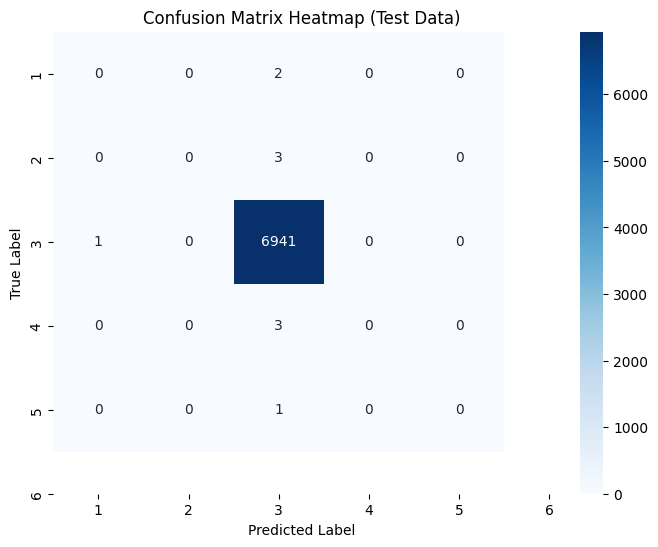

In [15]:
y_pred = dt_model.predict(X_test)

conf_matrix_test = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Test Data)')
plt.show()

In [16]:
train_accuracy = accuracy_score(y_train, dt_model.predict(X_train))
print(f'Training Accuracy: {train_accuracy:.4f}')

Training Accuracy: 0.9988


In [17]:
# Predict on the training set to get predictions for the training data
y_train_pred = dt_model.predict(X_train)

# Now you can calculate the accuracy and classification report for the training set
accuracy = accuracy_score(y_train, y_train_pred)
class_report = classification_report(y_train, y_train_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Classification Report:\n', class_report)

Accuracy: 0.9988
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.14      0.25         7
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00     16195
           5       0.00      0.00      0.00         6
           6       1.00      0.14      0.25         7

    accuracy                           1.00     16217
   macro avg       0.67      0.38      0.42     16217
weighted avg       1.00      1.00      1.00     16217



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


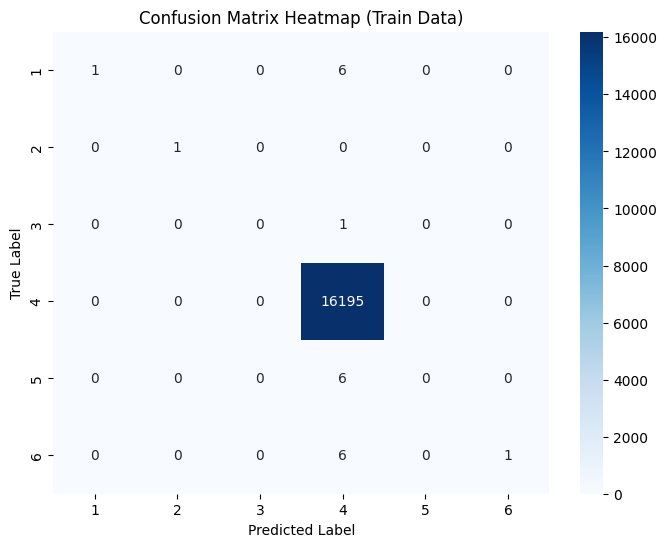

In [18]:
y_train_pred = dt_model.predict(X_train)

# Calculate the confusion matrix for the training set
conf_matrix_train = confusion_matrix(y_train, y_train_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=dt_model.classes_, yticklabels=dt_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap (Train Data)')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


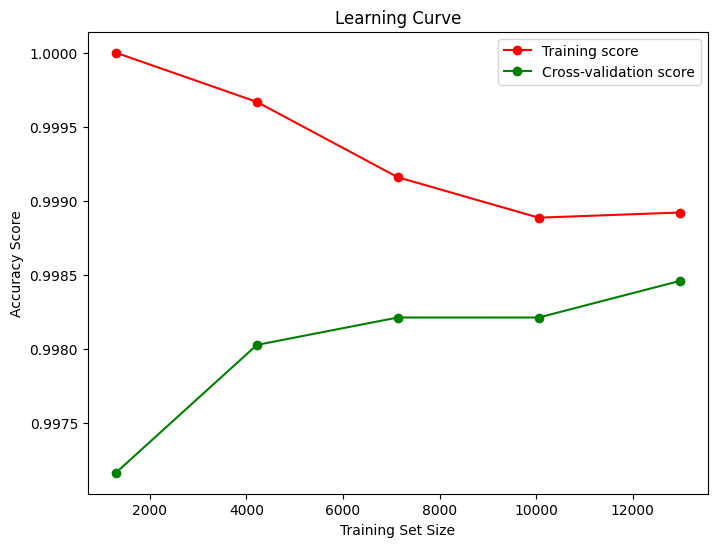

In [19]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(dt_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend(loc="best")
plt.show()